https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

In [80]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [9]:
data = pd.DataFrame({'date': ['2014-01-01', '2014-02-01', '2014-03-01', 
                             '2014-04-01', '2014-05-01', '2014-06-01', 
                             '2014-07-01', '2014-08-01', '2014-09-01', 
                             '2014-10-01', '2014-11-01', '2014-12-01', 
                             '2015-01-01', '2015-02-01', '2015-03-01', 
                             '2015-04-01', '2015-05-01', '2015-06-01', 
                             '2015-07-01', '2015-08-01', '2015-09-01', 
                             '2015-10-01', '2015-11-01', '2015-12-01', 
                             '2016-01-01', '2016-02-01', '2016-03-01', 
                             '2016-04-01', '2016-05-01', '2016-06-01', 
                             '2016-07-01', '2016-08-01', '2016-09-01', 
                             '2016-10-01', '2016-11-01', '2016-12-01', 
                             '2017-01-01', '2017-02-01', '2017-03-01', 
                             '2017-04-01', '2017-05-01', '2017-06-01', 
                             '2017-07-01', '2017-08-01', '2017-09-01', 
                             '2017-10-01', '2017-11-01', '2017-12-01',
                             '2018-01-01', '2018-02-01', '2018-03-01', 
                             '2018-04-01', '2018-05-01', '2018-06-01', 
                             '2018-07-01', '2018-08-01', '2018-09-01', 
                             '2018-10-01', '2018-11-01', '2018-12-01', 
                             '2019-01-01', '2019-02-01', '2019-03-01', 
                             '2019-04-01', '2019-05-01', '2019-06-01', 
                             '2019-07-01', '2019-08-01', '2019-09-01', 
                             '2019-10-01', '2019-11-01', '2019-12-01',
                             '2020-01-01', '2020-02-01', '2020-03-01', 
                             '2020-04-01', '2020-05-01', '2020-06-01', 
                             '2020-07-01', '2020-08-01', '2020-09-01', 
                             '2020-10-01', '2020-11-01', '2020-12-01', 
                             '2021-01-01', '2021-02-01', '2021-03-01', 
                             '2021-04-01', '2021-05-01', '2021-06-01', 
                             '2021-07-01', '2021-08-01', '2021-09-01', 
                             '2021-10-01', '2021-11-01', '2021-12-01',
                             '2022-01-01', '2022-02-01', '2022-03-01', 
                             '2022-04-01', '2022-05-01', '2022-06-01', 
                             '2022-07-01', '2022-08-01', '2022-09-01', 
                             '2022-10-01', '2022-11-01', '2022-12-01', 
                             '2023-01-01', '2023-02-01', '2023-03-01', 
                             '2023-04-01', '2023-05-01', '2023-06-01', 
                             '2023-07-01', '2023-08-01', '2023-09-01', 
                             '2023-10-01', '2023-11-01', '2023-12-01', 
                             '2024-01-01', '2024-02-01'],
             'value' : [63496151, 56234372, 68804148, 
                             55580629, 59652496, 60227032, 
                             62783995, 58447664, 56257050, 
                             58351675, 66311708, 146809456, 
                             78420996, 67434850, 67530793, 
                             75419220, 72929312, 70119174, 
                             82265105, 71976856, 69222116, 
                             84934710, 72548839, 164124743, 
                             97146919, 82917735, 97279170, 
                             85373022, 85886334, 85222910, 
                             81506128, 82209959, 79095731, 
                             75432082, 73110819, 71500246, 
                             69419234, 64777543, 105151649, 
                             60979133, 66556800, 79861898, 
                             63394287, 61800262, 75076093, 
                             61219300, 62577258, 71695738,
                             80126491, 65891700, 102591447, 
                             85857770, 74164053, 72368860, 
                             83446650, 69037625, 67965123, 
                             81237573, 67928106, 70365785, 
                             94010526, 69657776, 112634612,
                             83868507, 89844506, 77014824, 
                             81744412, 78080073, 75374653,
                             91940283, 76102754, 122869502, 
                             124777573, 80555723, 106755778,
                             120782081, 112563815, 82583604, 
                             79016142, 119907740, 80323889, 
                             71632970, 118623964, 93137731, 
                             94420933, 111996561, 101432276, 
                             99123657, 154569785, 93577661, 
                             143664088, 132128682, 91464763,
                             143387443, 149577360, 164646261,
                             192196700, 112646642, 116248039, 
                             126025631, 116339793, 109706317, 
                             110676492, 119359398, 114289550, 
                             120602109, 118910435, 143093088, 
                             160717752, 146145585, 172599752, 
                             166860616, 175754951, 169078291, 
                             176897057, 176234215, 182459400, 
                             197835225, 191313763, 241070955, 
                             232562074, 216086604]})
data.index = pd.to_datetime(data['date'])
data = data[['value']]
df = data.copy()

In [10]:
df = df.reset_index(drop=True)
df = df[['value']]

# Analysis of Time Series

## Finding d

In [11]:
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.831335
p-value: 1.000000


### Autocorrelation plot

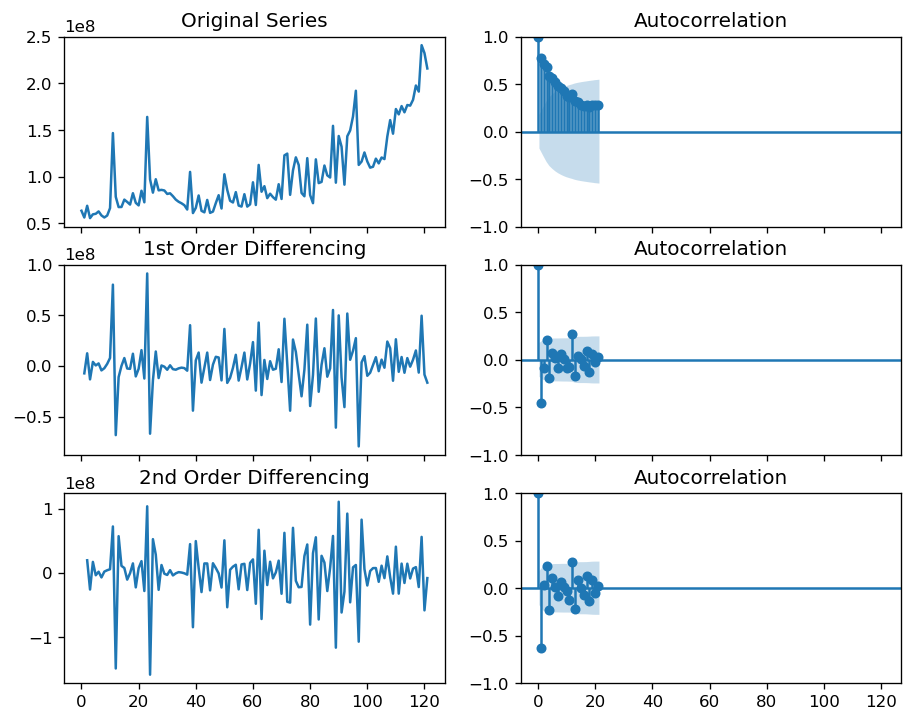

In [12]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [13]:
def adf_kpss_pp(y):
    return ndiffs(y, test='adf'), ndiffs(y, test='kpss'), ndiffs(y, test='pp')

In [14]:
adf_kpss_pp(df.value)

(1, 1, 0)

## Finding p

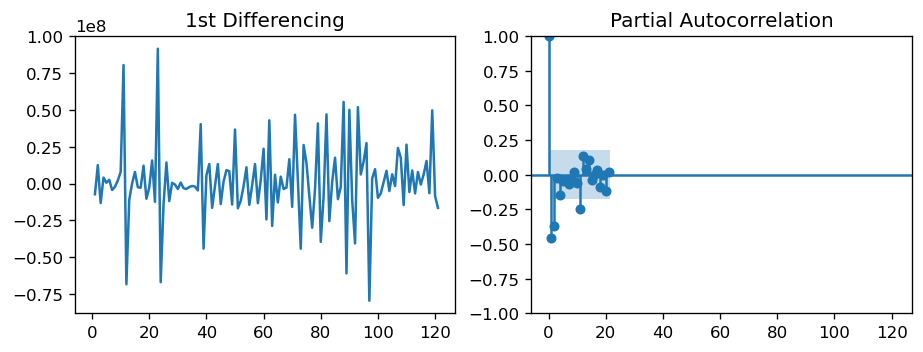

In [15]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

*Examine the PACF plot and identify the lags where the correlation significantly deviates from zero. These lags indicate the number of AR terms that may be useful to include in the ARIMA model.*

## Finding q

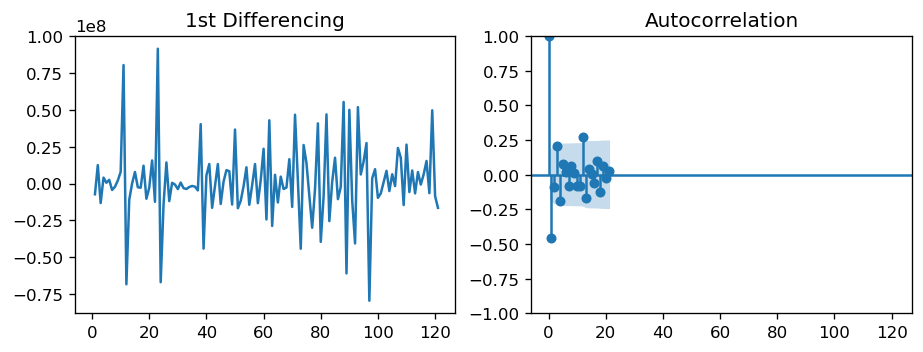

In [16]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

*Examine the ACF plot and identify the lags where the correlation significantly deviates from zero. These lags indicate the number of AR terms that may be useful to include in the ARIMA model.*

# ARIMA

In [17]:
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4434.794, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4471.824, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4445.906, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4434.730, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4470.131, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4438.459, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4433.739, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4433.243, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4433.006, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4431.334, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4433.240, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4434.905, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=4431.728, Time=0.02 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 0.481 seconds
                      

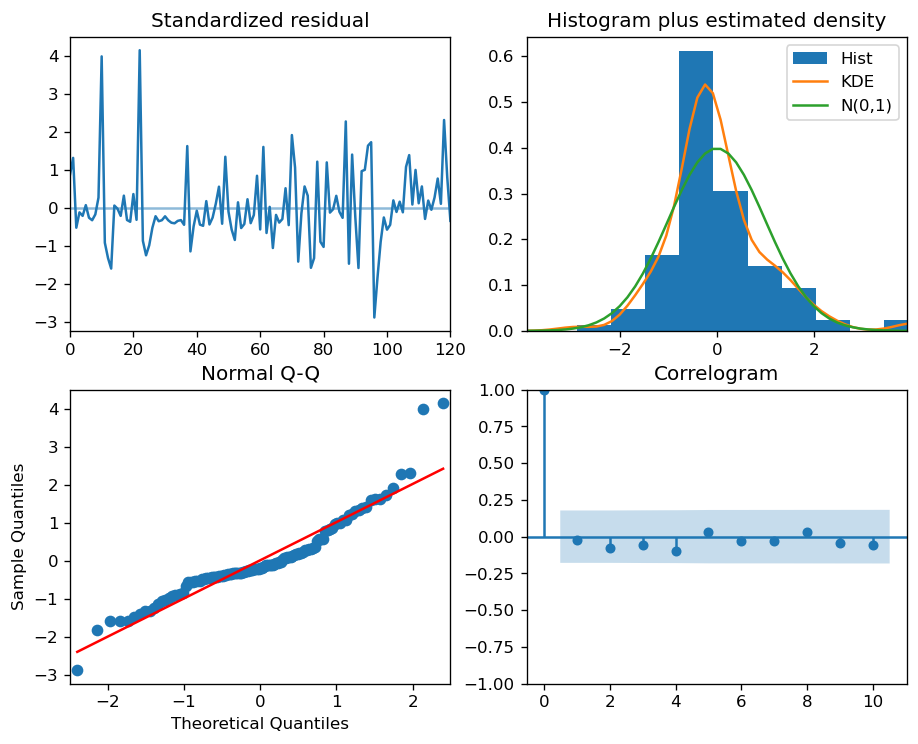

In [18]:
model.plot_diagnostics(figsize=(9,7))
plt.show()

*Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.*

*Top Right: The density plot suggest normal distribution with mean zero.*

*Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.*

*Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.*

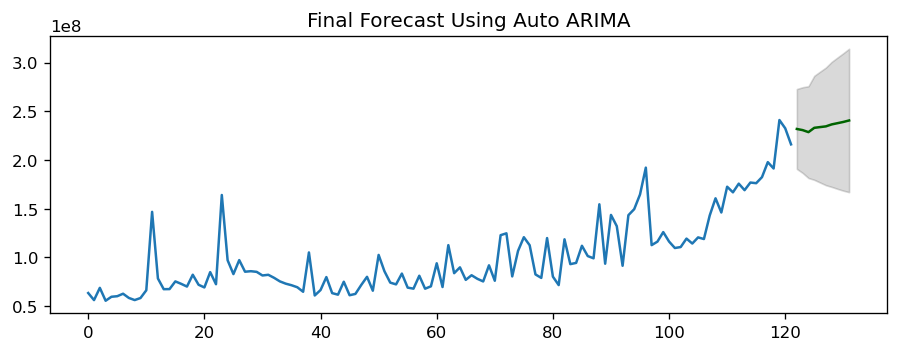

In [19]:
# Forecast
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast Using Auto ARIMA")
plt.show()

In [20]:
ARIMA = pd.DataFrame(fc_series.astype(int), columns=['prediction'])
ARIMA.head(1)

,prediction
122,231883368


# SARIMA

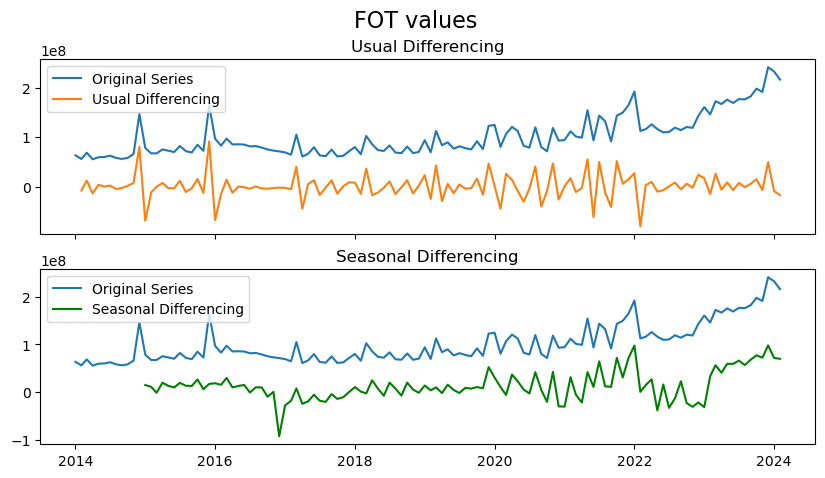

In [21]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('FOT values', fontsize=16)
plt.show()

In [22]:
smodel = pm.auto_arima(data[:-2], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3927.336, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3989.854, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3950.217, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3926.416, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3958.777, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3928.230, Time=0.16 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3928.226, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3939.752, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3930.226, Time=0.52 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3956.623, Time=0.07 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3931.419, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3933.693, Time=0.11 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=3927.914, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=3937.189, Time=0.11 sec

Best model:  ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1960.208
Date:                            Sat, 04 May 2024   AIC                           3926.416
Time:                                    11:36:23   BIC                           3934.434
Sample:                                01-01-2014   HQIC                          3929.666
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5672      0.139     -4.088      0.000      -0.839      -0.295
ma.S.L12      -0.7752      0.160     -4.856      0.000      -1.088      -0.462
sigma2      6.998e+14        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.46   Prob(JB):                         0.69
Heteroskedasticity (H):               1.32   Skew:                            -0.02
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.49e+46. Standard errors may be unstable.
"""

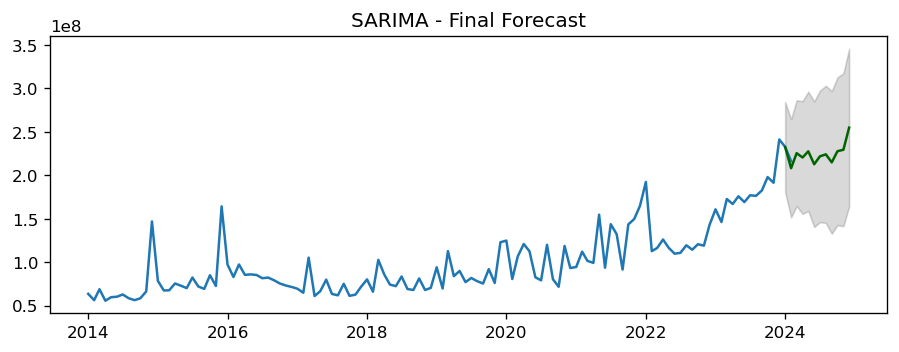

In [23]:
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-2], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast")
plt.show()

In [55]:
actual = pd.DataFrame({'date': ['2024-01-01', '2024-02-01', '2024-03-01', 
                             '2024-04-01'],
                       'actual': [232562074, 216086604, 230837507,
                                181499869]})

actual.index = pd.to_datetime(actual['date'])
actual.index.name = None
actual = actual[['actual']]

In [73]:
SARIMA = pd.DataFrame(fitted.astype(int), columns=['prediction'])
SARIMA.head(2)

,prediction
2024-03-01,229013861
2024-04-01,223938084


In [72]:
actual.tail(2)

,actual
2024-03-01,230837507
2024-04-01,181499869


In [40]:
march = pd.DataFrame(index = ['2024-03-01'], data = [230837507]).astype('int32')
round(SARIMA.loc['2024-03-01']['prediction'] / march.loc['2024-03-01'][0] * 100, 0)

98.0

In [41]:
april = pd.DataFrame(index = ['2024-04-01'], data = [181499869]).astype('int32')
round((april.loc['2024-04-01'][0] / SARIMA.loc['2024-04-01']['prediction']) * 100, 0)

82.0

In [81]:
mean_absolute_percentage_error(actual.tail(2), SARIMA.head(2))

0.12085983189623371

*The result is really good, and based on it I can say that the algorithm predicts the value for the next month quite well*

# SARIMAX

*SARIMAX is particularly valuable when dealing with time-dependent data that exhibits recurring patterns over specific time intervals.*

In [27]:
# multiplicative seasonal component
result_mul = seasonal_decompose(data.value[-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [28]:
# SARIMAX Model
sxmodel = pm.auto_arima(df.value, exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3998.706, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4063.130, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4022.711, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3997.806, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4030.949, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3999.578, Time=0.12 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3999.570, Time=0.17 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4012.099, Time=0.09 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4001.569, Time=0.48 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4027.427, Time=0.07 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=4002.794, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4005.218, Time=0.10 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=3999.253, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=4007.432, Time=0.12 sec

Best model:  ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  122
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1995.903
Date:                            Sat, 04 May 2024   AIC                           3997.806
Time:                                    11:36:25   BIC                           4005.880
Sample:                                01-01-2014   HQIC                          4001.080
                                     - 02-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5648      0.137     -4.121      0.000      -0.833      -0.296
ma.S.L12      -0.7791      0.159     -4.899      0.000      -1.091      -0.467
sigma2      6.889e+14        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.45   Prob(JB):                         0.61
Heteroskedasticity (H):               1.25   Skew:                            -0.03
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.37e+45. Standard errors may be unstable.
"""

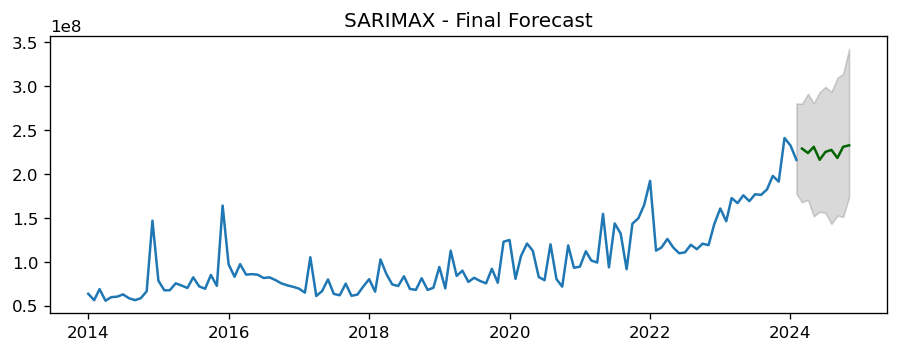

In [29]:
# Forecast
n_periods = 10
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.seasonal, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data.value)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX - Final Forecast")
plt.show()

In [30]:
SARIMAX = pd.DataFrame(fitted_series.dropna().astype(int), columns=['prediction'])
SARIMAX.head(1)

,prediction
2024-03-01,229013861
